In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

2024-01-31 14:50:18.115764: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-31 14:50:18.148492: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 14:50:18.148521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 14:50:18.149286: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-31 14:50:18.155550: I tensorflow/core/platform/cpu_feature_guar

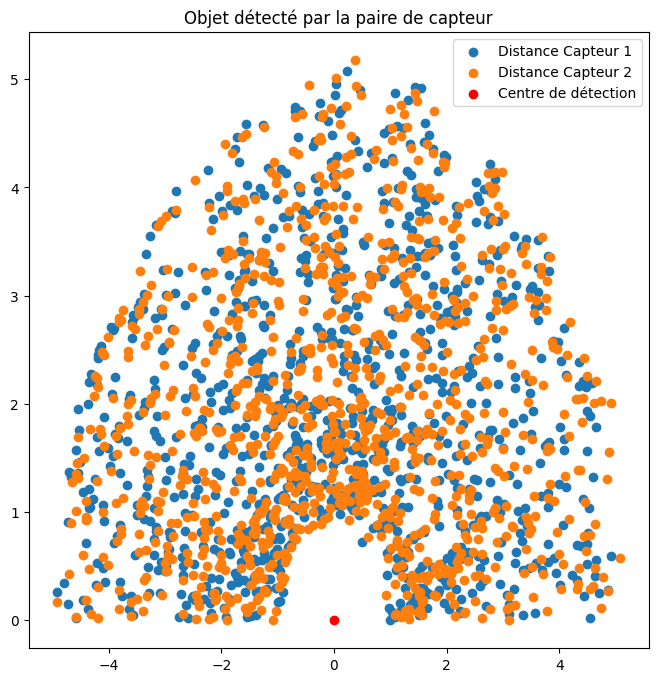

In [8]:
# Generate some sample data for training
np.random.seed(42)

d = 0.05

y = np.random.uniform(1, 5, size=1000)

noise_1 = np.random.normal(0, 0.1, size=1000)
noise_2 = np.random.normal(0, 0.1, size=1000)

X1 = (np.sqrt(np.square(np.cos(y)) + np.square((d/2)+np.sin(y))))
X2 = (np.sqrt(np.square(np.cos(y)) + np.square((d/2)-np.sin(y))))

teta_x1 = (np.square(X1) + np.square(d/2) - np.square(y)) / (2 * X1 * (d/2))
teta_x2 = (np.square(X2) + np.square(d/2) - np.square(y)) / (2 * X2 * (d/2))
teta_y = (np.square(y) + np.square(d/2) - np.square(X2)) / (2 * y * (d/2))

X1_cartesian = X1 * np.cos(teta_x1)
Y1_cartesian = X1 * np.sin(teta_x1)

Y1_cartesian = np.sqrt(np.square(Y1_cartesian))

X2_cartesian = X2 * np.cos(teta_x2)
Y2_cartesian = X2 * np.sin(teta_x2)

Y2_cartesian = np.sqrt(np.square(Y2_cartesian))

Xy_cartesian = y * np.cos(teta_y)
Yy_cartesian = y * np.sin(teta_y)

Yy_cartesian = np.sqrt(np.square(Yy_cartesian))

X1_cartesian_new = Xy_cartesian - 0.025 + noise_1
Y1_cartesian_new = np.sqrt(np.square(Yy_cartesian + noise_1))

X1_new = np.sqrt(X1_cartesian_new**2 + Y1_cartesian_new**2)

X2_cartesian_new = Xy_cartesian + 0.025 + noise_2
Y2_cartesian_new = np.sqrt(np.square(Yy_cartesian + noise_2))

X2_new = np.sqrt(X2_cartesian_new**2 + Y2_cartesian_new**2)

X = np.column_stack((X1_new, X2_new))
# Plot the points in Cartesian coordinates
plt.figure(figsize=(8, 8))
plt.title("Objet détecté par la paire de capteur")
plt.scatter(X1_cartesian_new, Y1_cartesian_new, label='Distance Capteur 1')
plt.scatter(X2_cartesian_new, Y2_cartesian_new, label='Distance Capteur 2')
plt.scatter(0, 0, label='Centre de détection', color='red')
plt.legend()
plt.show()

In [11]:
split_index = int(len(y) * 0.8)

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

In [9]:
# Create a linear regression model
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='linear'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer="adam", loss='mean_squared_error')

# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 8)                 24        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
800/800 [==============================] - 1s 878us/step - loss: 1.7479
Epoch 2/10
800/800 [==============================] - 1s 848us/step - loss: 0.0370
Epoch 3/10
800/800 [==============================] - 1s 860us/step - loss: 0.0129
Epoch 4/10
800/800 [==============================] - 1s 919us/step - loss: 0.0104
Epoch 5/10
800/800 [==============================] - 1s 808us/step - loss: 0.0092
Epoch 6/10
800/800 [==============================] - 1s 897us/step - loss: 0.0082
Epoch 7/10
800/800 [==============================] - 1s 939us/step - loss: 0.0075
Epoch 8/10
800/800 [==============================] - 1s 849us/step - loss: 0.0070
Epoch 9/10
800/800 [==============================] - 1s 820us/step - loss: 0.0065
Epoch 10/10
800/800 [==============================] - 1s 866us/step - loss: 0.0067


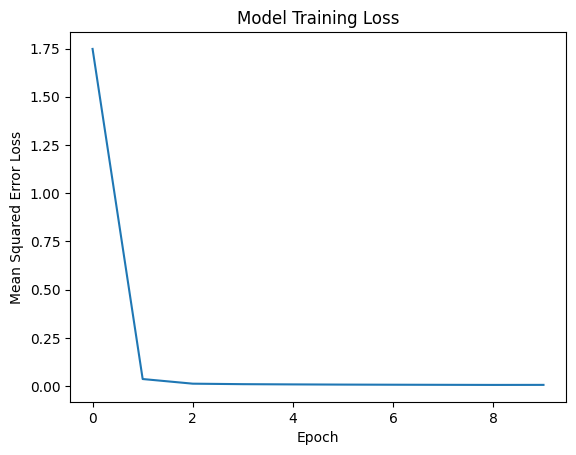

In [13]:
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.show()

7/7 [==============================] - 0s 1ms/step


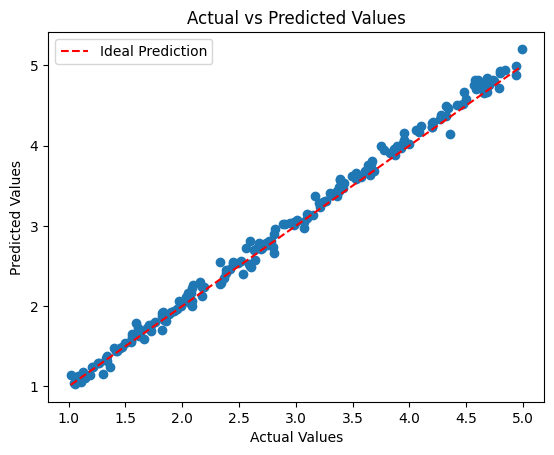

In [14]:
y_pred = model.predict(X_test)

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [15]:
# Calculate percentage error
percentage_error = np.abs((y_test - y_pred.flatten()) / y_test) * 100

# Print the mean percentage error
mean_percentage_error = np.mean(percentage_error)
print(f"\nMean Percentage Error: {mean_percentage_error:.2f}%")


Mean Percentage Error: 2.77%


In [16]:
model.save('model.pfe.h5')

/home/grunloc/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
